In [1]:
import numpy as np
import scipy.sparse.linalg as ssl
import matplotlib.pyplot as plt
import imageio as iio
from skimage.measure import block_reduce

In [2]:
# Load all pictures for each subject, downsample by a factor of 4, flatten and store each image as a row in the data matrix
# Subject 1
glasses1 = block_reduce(iio.imread('yalefaces/subject01.glasses.gif'), block_size=(4,4))
happy1 = block_reduce(iio.imread('yalefaces/subject01.happy.gif'), block_size=(4,4))
left1 = block_reduce(iio.imread('yalefaces/subject01.leftlight.gif'), block_size=(4,4))
noglasses1 = block_reduce(iio.imread('yalefaces/subject01.noglasses.gif'), block_size=(4,4))
normal1 = block_reduce(iio.imread('yalefaces/subject01.normal.gif'), block_size=(4,4))
right1 = block_reduce(iio.imread('yalefaces/subject01.rightlight.gif'), block_size=(4,4))
sad1 = block_reduce(iio.imread('yalefaces/subject01.sad.gif'), block_size=(4,4))
sleepy1 = block_reduce(iio.imread('yalefaces/subject01.sleepy.gif'), block_size=(4,4))
surprised1 = block_reduce(iio.imread('yalefaces/subject01.surprised.gif'), block_size=(4,4))
wink1 = block_reduce(iio.imread('yalefaces/subject01.wink.gif'), block_size=(4,4))

shape1 = glasses1.shape

A1 = np.concatenate((glasses1.reshape((1,shape1[0]*shape1[1])),\
                    happy1.reshape((1,shape1[0]*shape1[1])),\
                    left1.reshape((1,shape1[0]*shape1[1])),\
                    noglasses1.reshape((1,shape1[0]*shape1[1])),\
                    normal1.reshape((1,shape1[0]*shape1[1])),\
                    right1.reshape((1,shape1[0]*shape1[1])),\
                    sad1.reshape((1,shape1[0]*shape1[1])),\
                    sleepy1.reshape((1,shape1[0]*shape1[1])),\
                    surprised1.reshape((1,shape1[0]*shape1[1])),\
                    wink1.reshape((1,shape1[0]*shape1[1]))), axis=0)

m1,n1 = A1.shape
A1 = A1.T

# Subject 2
glasses2 = block_reduce(iio.imread('yalefaces/subject02.glasses.gif'), block_size=(4,4))
happy2 = block_reduce(iio.imread('yalefaces/subject02.happy.gif'), block_size=(4,4))
left2 = block_reduce(iio.imread('yalefaces/subject02.leftlight.gif'), block_size=(4,4))
noglasses2 = block_reduce(iio.imread('yalefaces/subject02.noglasses.gif'), block_size=(4,4))
normal2 = block_reduce(iio.imread('yalefaces/subject02.normal.gif'), block_size=(4,4))
right2 = block_reduce(iio.imread('yalefaces/subject02.rightlight.gif'), block_size=(4,4))
sad2 = block_reduce(iio.imread('yalefaces/subject02.sad.gif'), block_size=(4,4))
sleepy2 = block_reduce(iio.imread('yalefaces/subject02.sleepy.gif'), block_size=(4,4))
wink2 = block_reduce(iio.imread('yalefaces/subject02.wink.gif'), block_size=(4,4))

shape2 = glasses2.shape

A2 = np.concatenate((glasses2.reshape((1,shape2[0]*shape2[1])),\
                    happy2.reshape((1,shape2[0]*shape2[1])),\
                    left2.reshape((1,shape2[0]*shape2[1])),\
                    noglasses2.reshape((1,shape2[0]*shape2[1])),\
                    normal2.reshape((1,shape2[0]*shape2[1])),\
                    right2.reshape((1,shape2[0]*shape2[1])),\
                    sad2.reshape((1,shape2[0]*shape2[1])),\
                    sleepy2.reshape((1,shape2[0]*shape2[1])),\
                    wink2.reshape((1,shape2[0]*shape2[1]))), axis=0)

m2,n2 = A2.shape
A2 = A2.T

In [3]:
# Apply PCA
mu1 = np.mean(A1, axis=1)
mu2 = np.mean(A2, axis=1)
xc1 = A1 - mu1[:, None]
xc2 = A2 - mu2[:, None]
C1 = np.dot(xc1,xc1.T)/m1
C2 = np.dot(xc2,xc2.T)/m2

k = 6
lambd1, w1 = ssl.eigs(C1)
lambd1 = lambd1.real
w1 = w1.real
lambd2, w2 = ssl.eigs(C2)
lambd2 = lambd2.real
w2 = w2.real

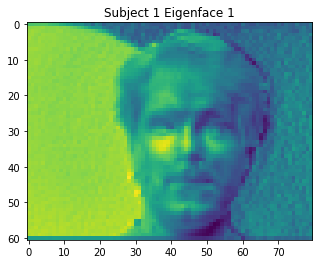

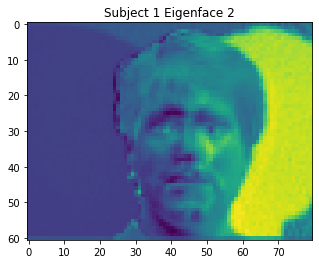

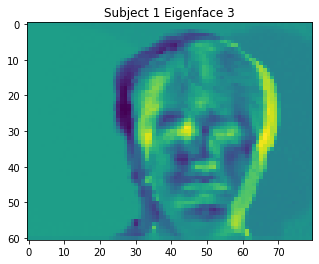

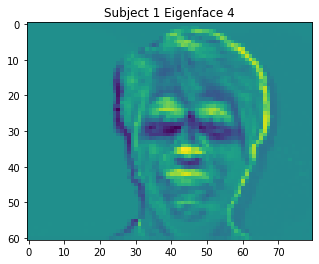

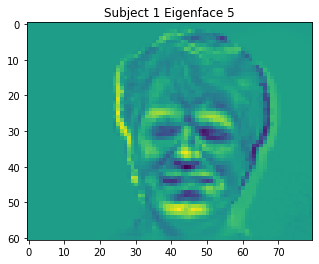

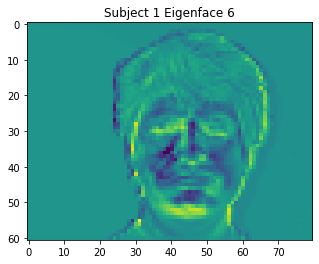

In [4]:
# Plot the first 6 eigenfaces for each subject
for i in range(w1.shape[1]):
    fig = plt.figure()
    plt.imshow(w1[:,i].T.reshape(shape1))
    plt.title('Subject 1 Eigenface {}'.format(i+1))

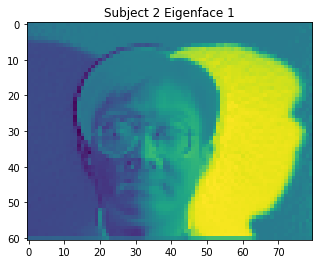

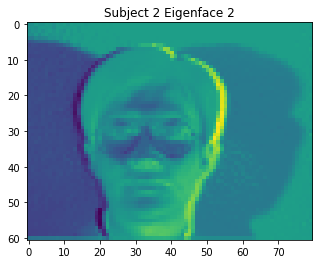

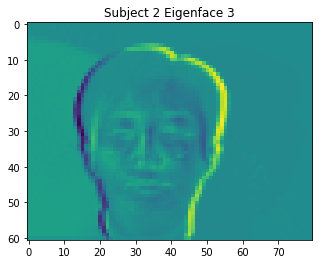

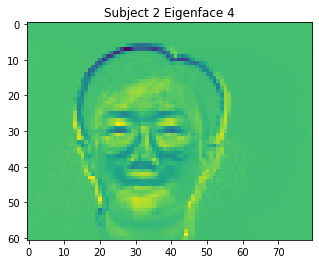

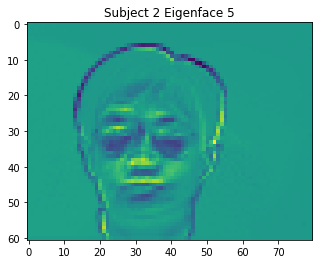

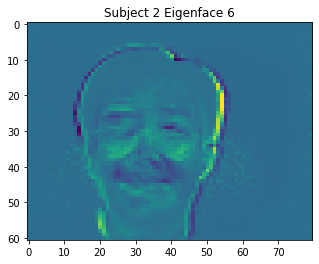

In [5]:
for i in range(w2.shape[1]):
    fig = plt.figure()
    plt.imshow(w2[:,i].T.reshape(shape2))
    plt.title('Subject 2 Eigenface {}'.format(i+1))

In [6]:
# Perform face recognition
# Load test images and vectorize
test1 = block_reduce(iio.imread('yalefaces/subject01-test.gif'), block_size=(4,4))
test1_vec = test1.reshape(1,test1.shape[0]*test1.shape[1]).T
test2 = block_reduce(iio.imread('yalefaces/subject02-test.gif'), block_size=(4,4))
test2_vec = test2.reshape(1,test2.shape[0]*test2.shape[1]).T
# Grab top eigenfaces for each subject
tef1 = w1[:,0:1]
tef2 = w2[:,0:1]

In [7]:
# Calculate the projection residual of each test image onto each eigenface
s11 = np.linalg.norm(test1_vec - np.dot(tef1, np.dot(tef1.T, test1_vec)))
s12 = np.linalg.norm(test2_vec - np.dot(tef1, np.dot(tef1.T, test2_vec)))
s21 = np.linalg.norm(test1_vec - np.dot(tef2, np.dot(tef2.T, test1_vec)))
s22 = np.linalg.norm(test2_vec - np.dot(tef2, np.dot(tef2.T, test2_vec)))
# The projection residuals are all large since the magnitudes of the pixel values are very different between the eigenfaces and
# the test images, but that shouldn't be an issue since we only care about the relative values of the projection residuals for
# the purposes of the face recognition problem
print('s11 = {:e}'.format(s11))
print('s12 = {:e}'.format(s12))
print('s21 = {:e}'.format(s21))
print('s22 = {:e}'.format(s22))

s11 = 1.082414e+05
s12 = 1.674967e+05
s21 = 2.246333e+05
s22 = 2.131047e+05
